In [1]:
%matplotlib notebook

In [2]:
import tensorflow as tf
import numpy as np
import time

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles

In [4]:
DATA_TYPE = 'blobs'

In [5]:
# Number of clusters, if we choose circles, only 2 will be enough
if (DATA_TYPE == 'circle'):
    K=2
else:
    K=4

In [6]:
# Maximum number of iterations, if the conditions are not met
MAX_ITERS = 1000

In [7]:
start = time.time()

In [8]:
centers = [(-2, -2), (-2, 1.5), (1.5, -2), (2, 1.5)]
if (DATA_TYPE == 'circle'):
    data, features = make_circles(n_samples=200, shuffle=True, noise= 0.01, factor=0.4)
else:
    data, features = make_blobs (n_samples=200, centers=centers, n_features = 2, cluster_std=0.8, shuffle=False, random_state=42)

<IPython.core.display.Javascript object>


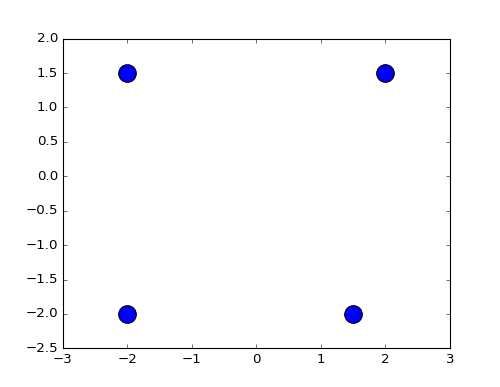

In [9]:
fig, ax = plt.subplots()
ax.scatter(np.asarray(centers).transpose()[0], np.asarray(centers).transpose()[1], marker = 'o', s = 250)
plt.show()

<IPython.core.display.Javascript object>


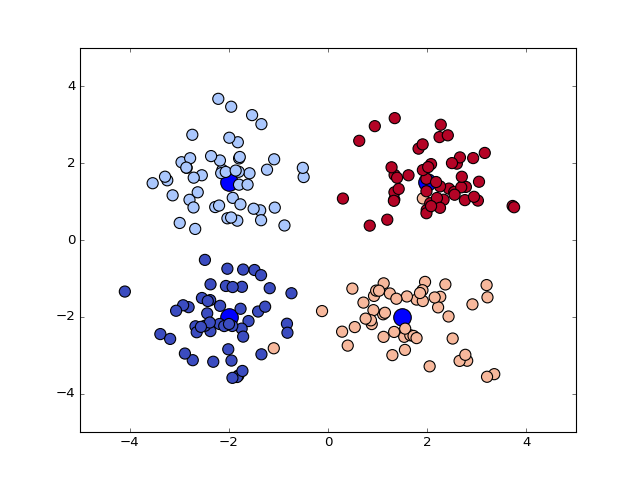

In [10]:
fig, ax = plt.subplots()
if (DATA_TYPE == 'blobs'):
	ax.scatter(np.asarray(centers).transpose()[0], np.asarray(centers).transpose()[1], marker = 'o', s = 250)
	ax.scatter(data.transpose()[0], data.transpose()[1], marker = 'o', s = 100, c = features, cmap=plt.cm.coolwarm )
	plt.plot()

In [11]:
points=tf.Variable(data)
cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.int64))

In [12]:
centroids = tf.Variable(tf.slice(points.initialized_value(), [0,0], [K,2]))

In [13]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [14]:
sess.run(centroids)

array([[-1.60262868, -2.11061144],
       [-1.48184917, -0.78157611],
       [-2.1873227 , -2.18730957],
       [-0.73662975, -1.38605222]])

In [15]:
rep_centroids = tf.reshape(tf.tile(centroids, [N, 1]), [N, K, 2])
rep_points = tf.reshape(tf.tile(points, [1, K]), [N, K, 2])
sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids), 
reduction_indices=2)

In [16]:
best_centroids = tf.argmin(sum_squares, 1)

In [17]:
did_assignments_change = tf.reduce_any(tf.not_equal(best_centroids, cluster_assignments))

In [18]:
def bucket_mean(data, bucket_ids, num_buckets):
	total = tf.unsorted_segment_sum(data, bucket_ids, num_buckets)
	count = tf.unsorted_segment_sum(tf.ones_like(data), bucket_ids, num_buckets)
	return total / count

In [19]:
means = bucket_mean(points, best_centroids, K)

In [20]:
with tf.control_dependencies([did_assignments_change]):
	do_updates = tf.group(
	centroids.assign(means),
	cluster_assignments.assign(best_centroids))

In [21]:
changed = True
iters = 0


<IPython.core.display.Javascript object>


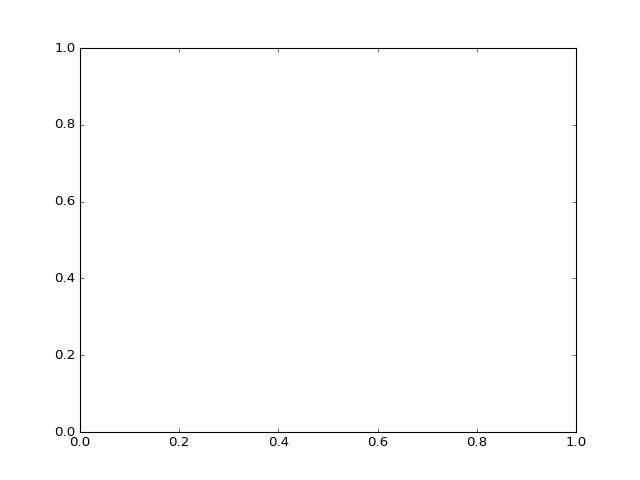

<IPython.core.display.Javascript object>


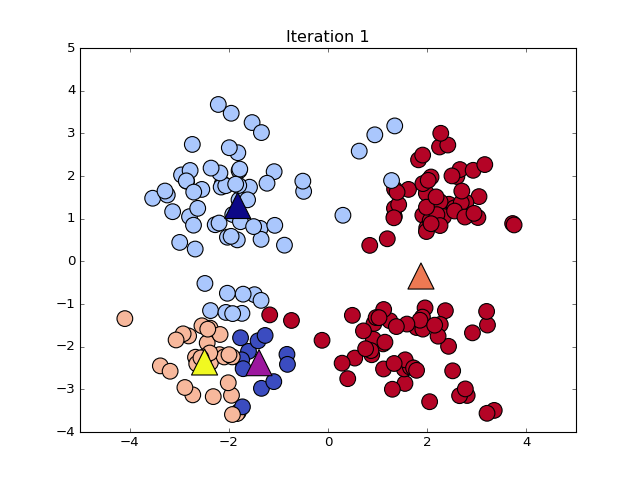

<IPython.core.display.Javascript object>


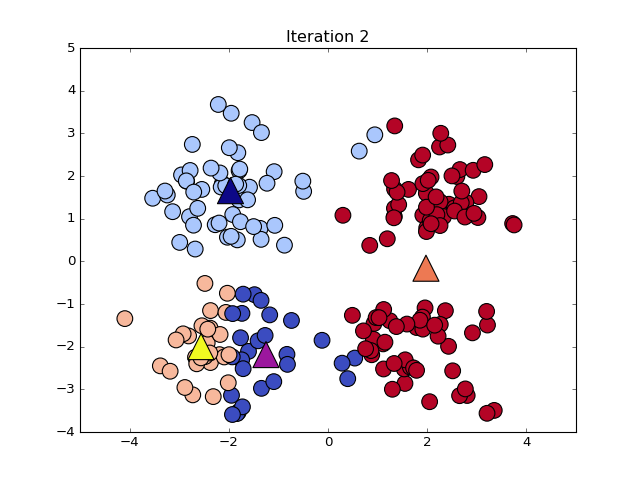

<IPython.core.display.Javascript object>


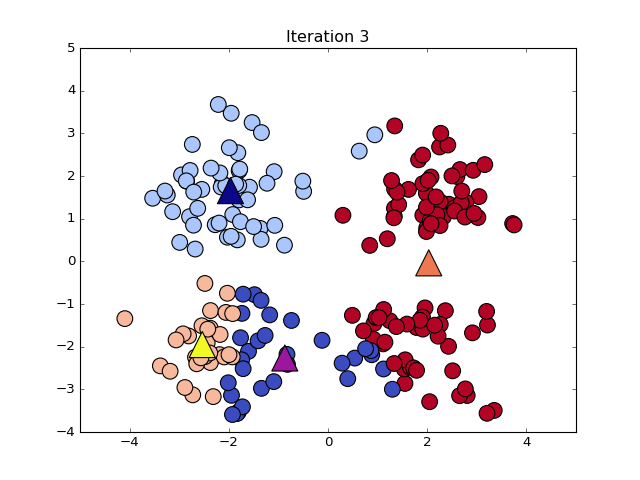

<IPython.core.display.Javascript object>


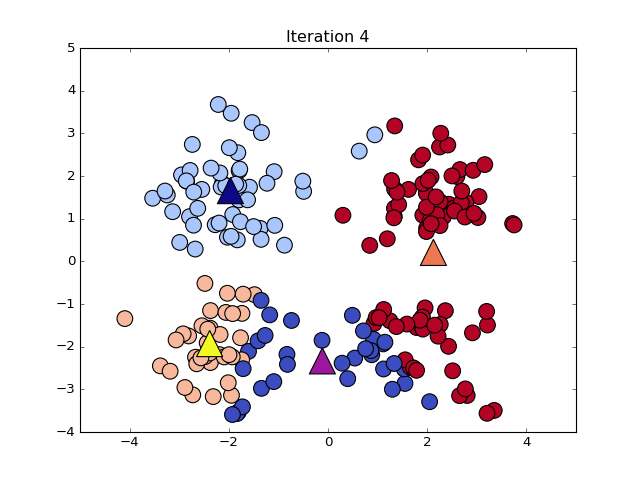

<IPython.core.display.Javascript object>


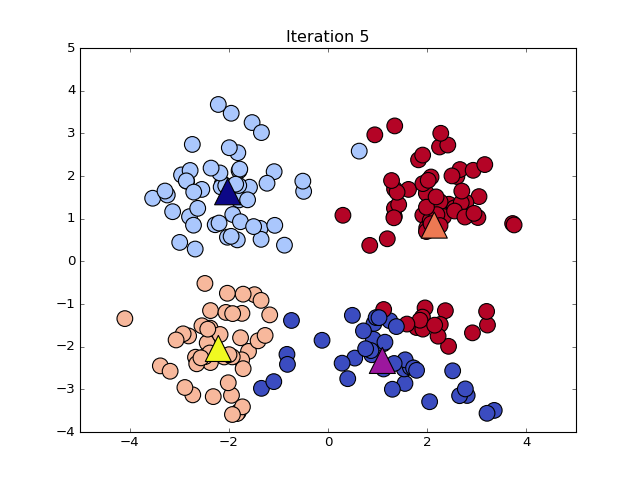

<IPython.core.display.Javascript object>


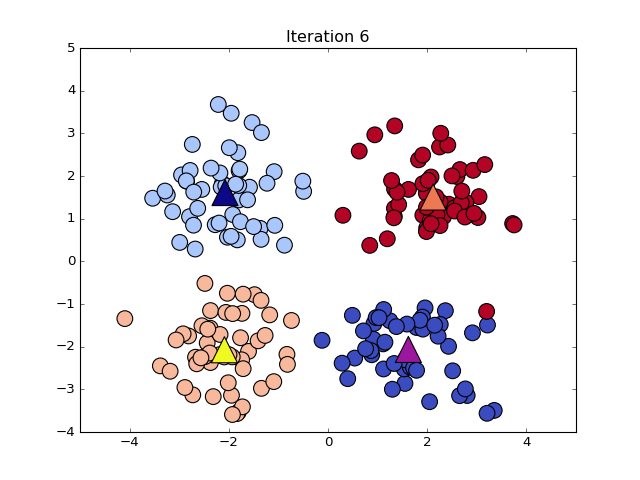

<IPython.core.display.Javascript object>


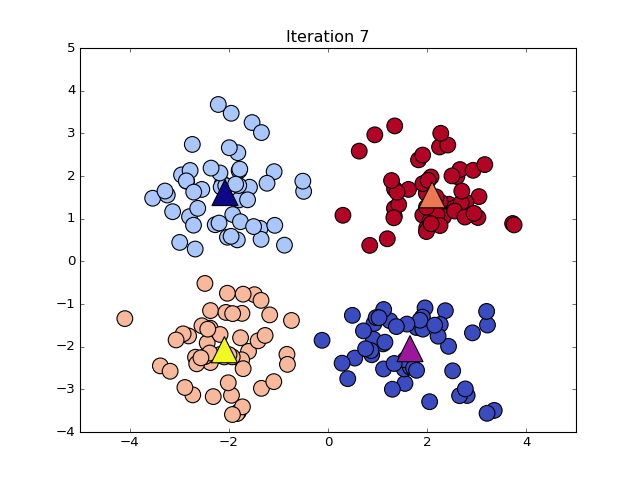

<IPython.core.display.Javascript object>


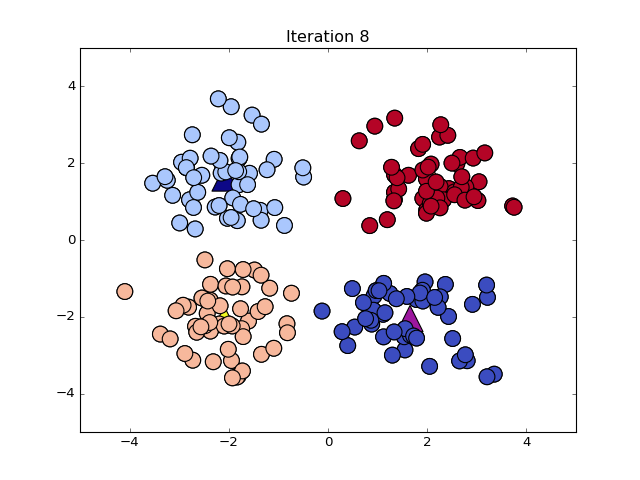

In [22]:
fig, ax = plt.subplots()
if (DATA_TYPE == 'blobs'):
    colourindexes=[2,1,4,3]
else:
    colourindexes=[2,1]
while changed and iters < MAX_ITERS:
	fig, ax = plt.subplots()
	iters += 1
	[changed, _] = sess.run([did_assignments_change, do_updates])
	[centers, assignments] = sess.run([centroids, cluster_assignments])
	ax.scatter(sess.run(points).transpose()[0], sess.run(points).transpose()[1], marker = 'o', s = 200, c = assignments, cmap=plt.cm.coolwarm )
	ax.scatter(centers[:,0],centers[:,1], marker = '^', s = 550, c = colourindexes, cmap=plt.cm.plasma)
	ax.set_title('Iteration ' + str(iters))
	plt.savefig("kmeans" + str(iters) +".png")

In [23]:
ax.scatter(sess.run(points).transpose()[0], sess.run(points).transpose()[1], marker = 'o', s = 200, c = assignments, cmap=plt.cm.coolwarm )
plt.show()

In [24]:
end = time.time()
print ("Found in %.2f seconds" % (end-start)), iters, "iterations"
print "Centroids:"
print centers
print "Cluster assignments:", assignments

Found in 8.75 seconds 8 iterations
Centroids:
[[ 1.65289262 -2.04643427]
 [-2.0763623   1.61204964]
 [-2.08862822 -2.07255306]
 [ 2.09831502  1.55936014]]
Cluster assignments: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
